<a href="https://colab.research.google.com/github/Aditi0102/ML-notebook/blob/main/CovNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import cv2
from google.colab.patches import cv2_imshow
import math

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aditiagarwal01","key":"4c56849565c39183e765f285aeafe7d3"}\r\n'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mohamedmustafa/real-life-violence-situations-dataset

100% 3.58G/3.58G [00:43<00:00, 66.7MB/s]
100% 3.58G/3.58G [00:43<00:00, 88.6MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip
clear_output()

In [ ]:
img_set = []
labels = []
count = 0
for i in range (1,50):
    videoFile = "/content/real life violence situations/Real Life Violence Dataset/Violence/V_%d.mp4" % i
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    print(f"Processing Violence_{i}")
    while True:
        ret, frame = cap.read()
        if ret is False:
            break
        img_set.append(cv2.resize(frame, (64,64)))
        labels.append(0)
    cap.release()
clear_output()
print("Done Training with Violence !!")

Done Training with Violence !!


In [ ]:
count = 0
for i in range (1,50):
    videoFile = "/content/real life violence situations/Real Life Violence Dataset/NonViolence/NV_%d.mp4" % i
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    print(f"Reading File NonViolence_{i}")
    while True:
        ret, frame = cap.read()
        if ret is False:
            break
        img_set.append(cv2.resize(frame, (64,64)))
        labels.append(1)
    cap.release()
clear_output()
print("Done Training with Non-Violence !!")

Done Training with Non-Violence !!


In [ ]:
img_set = np.array(img_set)
labels = np.array(labels)
class_names=["Violence", "Non-Violence"]
print(img_set.shape, labels.shape)

(12826, 64, 64, 3) (12826,)


In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(img_set, labels, test_size=0.1, shuffle=True, random_state=1)
train_images, test_images = train_images / 255.0, test_images / 255

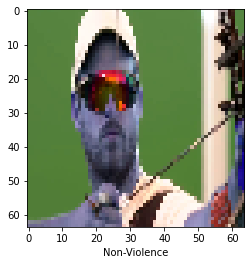

In [ ]:
IMG_INDEX = 9  # change this to look at other images
plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
361/361 [==============================] - 63s 172ms/step - loss: 0.6932 - accuracy: 0.5064
Epoch 2/10
361/361 [==============================] - 62s 173ms/step - loss: 0.6931 - accuracy: 0.5091
Epoch 3/10
361/361 [==============================] - 63s 173ms/step - loss: 0.6931 - accuracy: 0.5110
Epoch 4/10
361/361 [==============================] - 63s 173ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 5/10
361/361 [==============================] - 63s 174ms/step - loss: 0.6931 - accuracy: 0.5101
Epoch 6/10
361/361 [==============================] - 63s 173ms/step - loss: 0.6931 - accuracy: 0.5112
Epoch 7/10
361/361 [==============================] - 63s 174ms/step - loss: 0.6931 - accuracy: 0.5023
Epoch 8/10
361/361 [==============================] - 63s 173ms/step - loss: 0.6931 - accuracy: 0.5089
Epoch 9/10
361/361 [==============================] - 63s 173ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 10/10
361/361 [==============================] - 62s 173ms/step - l

In [ ]:
import time
t = time.time()
export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1610952410.h5


In [ ]:
!ls

 1610952410.h5	'Real Life Violence Dataset'	  sample_data
 kaggle.json	'real life violence situations'


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

41/41 - 2s - loss: 0.6931 - accuracy: 0.5004
0.5003896951675415
